In [32]:
# Imports
from datasets import load_dataset
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import random

# Visualizing the data

In [2]:
dataset = load_dataset("generative-newsai/news-unmasked")

Found cached dataset parquet (/Users/swapnilsharma/.cache/huggingface/datasets/generative-newsai___parquet/generative-newsai--news-unmasked-afc734a91f0700d7/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
train = dataset["train"]
test = dataset["test"]

In [4]:
train.__len__(), test.__len__()

(48988, 12247)

In [5]:
train.features, test.features

({'image': Image(decode=True, id=None),
  'section': Value(dtype='string', id=None),
  'headline': Value(dtype='string', id=None),
  'image_id': Value(dtype='string', id=None)},
 {'image': Image(decode=True, id=None),
  'section': Value(dtype='string', id=None),
  'headline': Value(dtype='string', id=None),
  'image_id': Value(dtype='string', id=None)})

In [6]:
train[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x295>,
 'section': 'Education',
 'headline': "Role for Teachers Is Seen in Solving Schools ' Crises",
 'image_id': '000055fd-f997-57a0-b586-49eaf0d930fc'}

In [45]:
test[random.choice(range(test.__len__()))]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=546x286>,
 'section': 'Technology',
 'headline': "How Trump 's Pick for [MASK] Antitrust Cop May Shape Competition",
 'image_id': 'f35f23ff-b348-5e36-84c7-df44766fbba4'}

In [47]:
# how many test headlines have [MASK] in them?
mask_token = "[MASK]"
test_with_mask = [x for x in test["headline"] if mask_token in x]
print(f"{len(test_with_mask)} out of {len(test)} test headlines have [MASK] in them")

5701 out of 12247 test headlines have [MASK] in them


In [48]:
# how many train headlines have [MASK] in them?
train_with_mask = [x for x in train["headline"] if mask_token in x]
print(f"{len(train_with_mask)} out of {len(train)} train headlines have [MASK] in them")

0 out of 48988 train headlines have [MASK] in them


In [7]:
sections = np.unique(train["section"])
print("Unique sections in the dataset: ", len(sections))

Unique sections in the dataset:  24


Observations: Not all the test entries have [MASK] token in them and there are 24 unique sections in the dataset.

## Plot section count

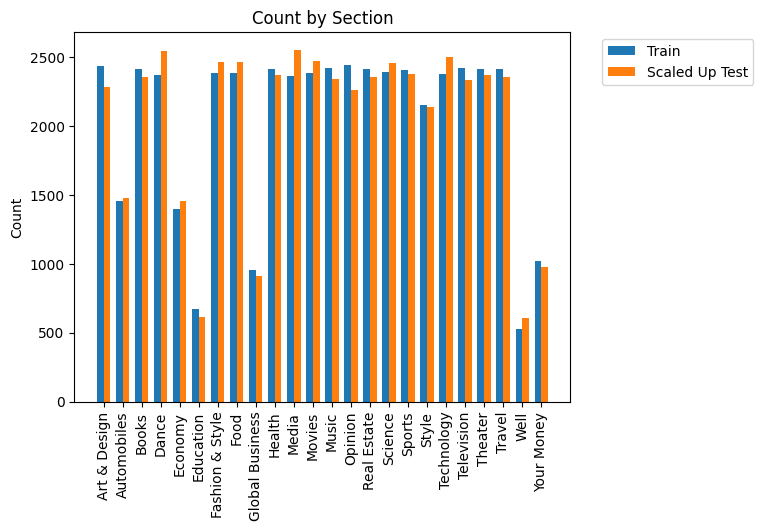

In [8]:
# Plot np unique with counts
z_train = np.unique(train["section"], return_counts=True)
z_test = np.unique(test["section"], return_counts=True)

# np unique returns sorted unique elements
assert np.array_equal(z_train[0], z_test[0])

# plot grouped bar chart
fig, ax = plt.subplots()
x = np.arange(len(z_train[0]))
width = 0.35
rects1 = ax.bar(x - width / 2, z_train[1], width, label="Train")
rects2 = ax.bar(x + width / 2, z_test[1]*(train.__len__()/test.__len__()), width, label="Scaled Up Test")
ax.set_ylabel("Count")
ax.set_title("Count by Section")
ax.set_xticks(x)
ax.set_xticklabels(z_train[0])
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=90)
plt.show()

Observations: We have 24 unique sections with Well, Education, Global Business, Your Money, Economy and Automobiles having lowest occurence. Train dataset and test dataset follow similar pattern for section distribution

## Plot headline length by section

In [9]:
# Group headline_length_per_section by section
from itertools import groupby

def groupby_section(dataset):
    ln_per_section = list(zip(dataset["section"], [len(headline) for headline in dataset["headline"]]))
    ln_per_section = sorted(ln_per_section, key=lambda x: x[0])
    ln_per_section = [(key, list(group)) for key, group in groupby(ln_per_section, lambda x: x[0])]
    ln_per_section = [(key, [x[1] for x in group]) for key, group in ln_per_section]
    ln_stats_per_section = [(key, np.mean(group), np.std(group)) for key, group in ln_per_section]
    return ln_stats_per_section

train_ln_stats_per_section = groupby_section(train)
test_ln_stats_per_section = groupby_section(test)

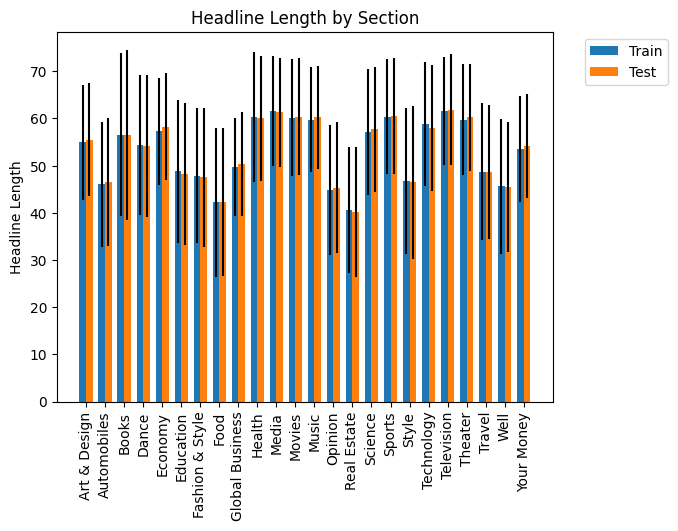

In [10]:
# Plot train_ln_stats_per_section and test_ln_stats_per_section as grouped bar chart with error bars
fig, ax = plt.subplots()
x = np.arange(len(train_ln_stats_per_section))
width = 0.35
rects1 = ax.bar(x - width / 2, [x[1] for x in train_ln_stats_per_section], width, yerr=[x[2] for x in train_ln_stats_per_section], label="Train")
rects2 = ax.bar(x + width / 2, [x[1] for x in test_ln_stats_per_section], width, yerr=[x[2] for x in test_ln_stats_per_section], label="Test")
ax.set_ylabel("Headline Length")
ax.set_title("Headline Length by Section")
ax.set_xticks(x)
ax.set_xticklabels([x[0] for x in train_ln_stats_per_section])
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=90)
plt.show()


Observations: No outliers in headline length. We can see that the length of the headline is similar across all sections and lies between ~30 to ~80 characters.

## Sample images

Uncomment to visualize

In [52]:
imgs = []
for i, section in enumerate(tqdm(sections)):
    indices = random.choices(np.where(np.asarray(train["section"]) == section)[0], k=5)
    imgs.append(train[indices]["image"])

100%|██████████| 24/24 [00:01<00:00, 18.05it/s]


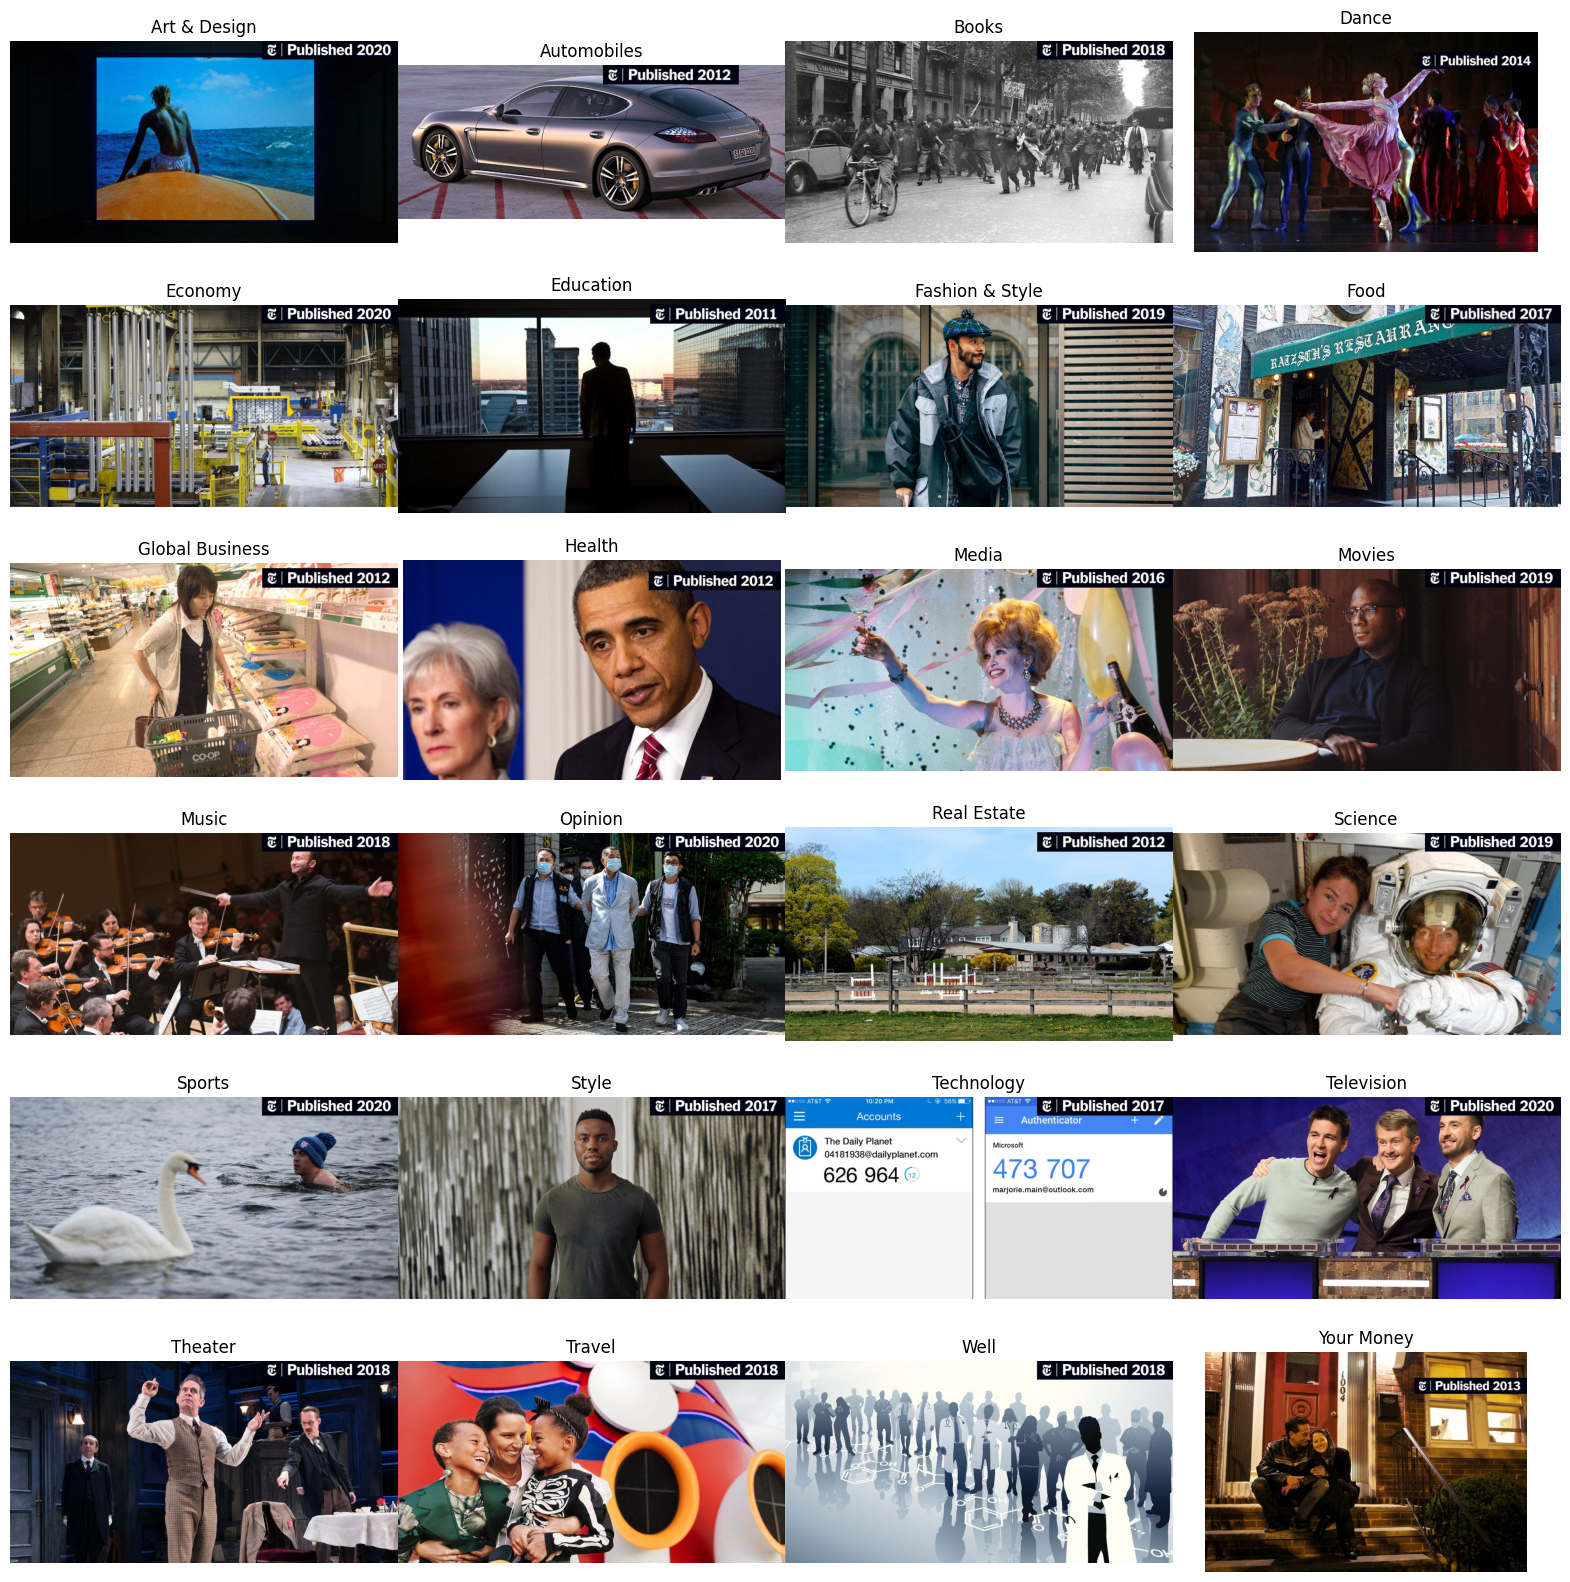

In [53]:
# Plot images for each section
fig, axs = plt.subplots(6, 4, figsize=(20, 20))
for i, ax in enumerate(axs.flat):
    ax.imshow(imgs[i][random.randint(0, 4)])
    ax.set_title(sections[i])
    ax.axis("off")
plt.subplots_adjust(wspace=0)
plt.show()

In [66]:
[img.size for img in train[random.sample(range(train.__len__()), 10)]["image"]]

[(1050, 550),
 (1050, 549),
 (1050, 549),
 (1050, 549),
 (1050, 550),
 (1050, 550),
 (600, 360),
 (600, 400),
 (1050, 550),
 (1050, 550)]

Observations: Visualized Images have nytimes labeel showing what year it was printed, and sizes vary across images

# Deberta-Base-Uncased